# **Exploratory Data Analysis on Supermarket Data**

**Importing necessary Libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore future warnings
warnings.filterwarnings("ignore")

## **01. Initial Data Exploration**

In [2]:
df = pd.read_csv("/content/supermarket_data.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [4]:
# Convert the data type of 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.rename(columns={'Total': 'Total amount'}, inplace=True)

In [6]:
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(exclude=['object'])

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total amount,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total amount,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## **02. Univariate Analysis**

Univariate analysis involves examining the distribution and characteristics of a single variable in isolation.

### **2.1 Distribution of Dependent variable (customer ratings)**

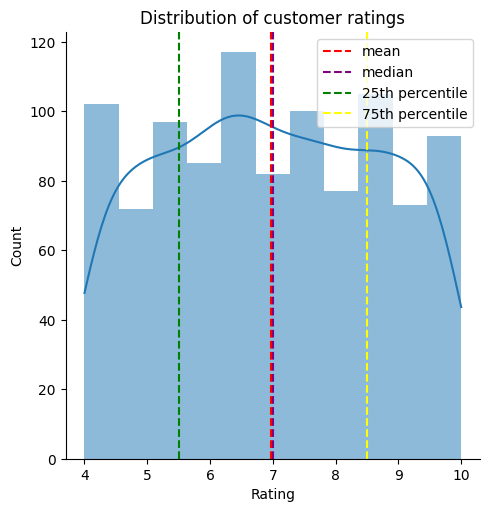

In [9]:
sns.displot(df['Rating'], kde=True, edgecolor='none')

# Add a vertical line at the mean, median, 25th percentile, 75th percentile of ratings
plt.axvline(np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(np.median(df['Rating']), c='purple', ls='--', label='median')

plt.axvline(np.percentile(df['Rating'], 25), c='green', ls='--', label='25th percentile')
plt.axvline(np.percentile(df['Rating'], 75), c='yellow', ls='--', label='75th percentile')

plt.title('Distribution of customer ratings')
plt.legend()

* Since the mean and median are close, we can infer that there is minimal skewness (Doesn't seem to be any skew in the left or right
direction.).
* The distribution of customer ratings looks relatively uniform.

### **2.2 Distribution of numerical independent variables**

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total amount'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'cogs'}>],
       [<Axes: title={'center': 'gross margin percentage'}>,
        <Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

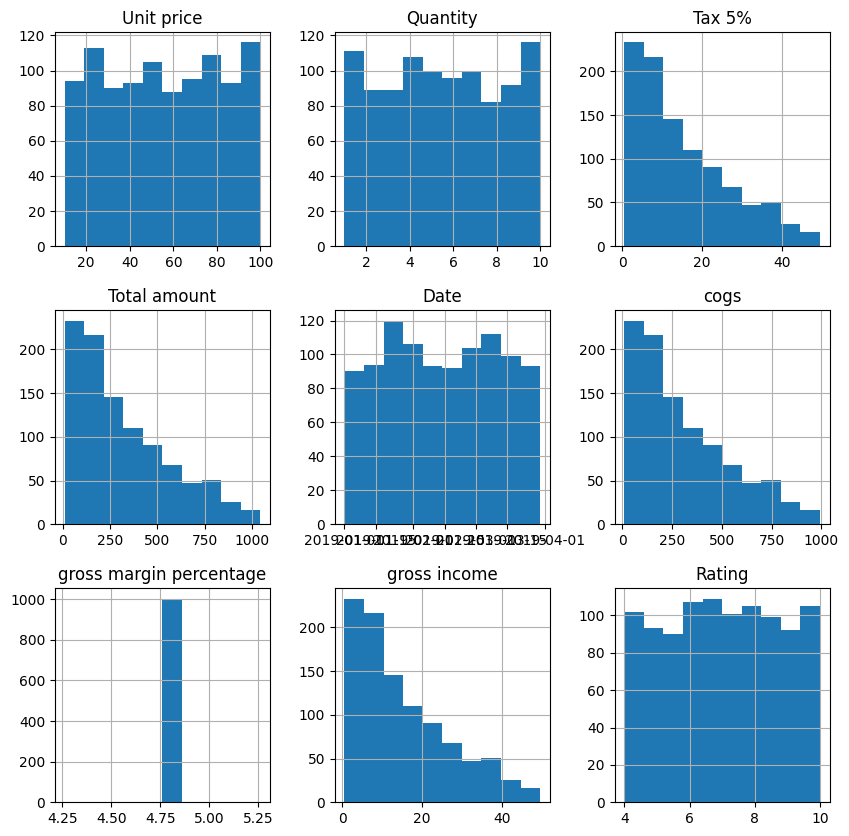

In [10]:
df.hist(figsize=(10,10))

* The distribution of **Unit price, Quantity** looks relatively uniform.
* The distribution of **tax 5%** exhibits a right skew indicating that the majority of tax amounts fall within the range of zero to 20. However, there are a few instances where the tax collected exceeds 40.
* The distribution of **Gross Margin Percentages** is likely concentrated around a constant value. This implies that there is a consistent level of profitability across the sales.
* The distribution of **Cost of goods sold, Total amount, Gross income** exhibits a right skew.
* The **Cost of goods sold, Total amount, Gross income, Tax 5%** are highly correlated variables because we can see that they all followed most identical distributions.


### **2.3 Is there a significant difference in sales among the various branches?**

In [11]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<Axes: xlabel='Branch', ylabel='count'>

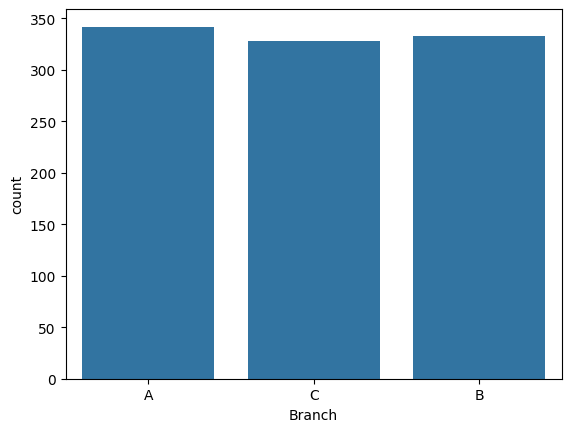

In [12]:
sns.countplot(data=df, x='Branch')

* The sales across Branches A, B, and C are quite similar, with Branch A having 342 sales, Branch B having 333 sales, and Branch C having 328 sales, indicating minimal differences among them.

### **2.4 Is there a significant difference in sales among the various Payment methods?**

<Axes: xlabel='Payment', ylabel='count'>

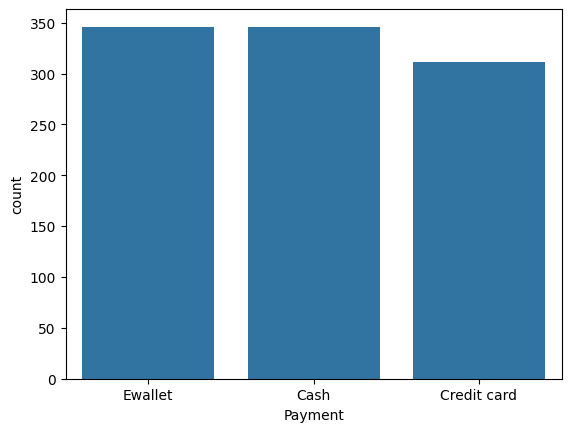

In [13]:
sns.countplot(data=df, x='Payment')

In [14]:
df['Payment'].value_counts()

Ewallet        346
Cash           346
Credit card    311
Name: Payment, dtype: int64

* E-wallet and cash payments are most popular, while credit card payments are the least favored by customers.

### **2.5 Is there a significant difference in sales among the various Product lines?**

<Axes: xlabel='Product line', ylabel='count'>

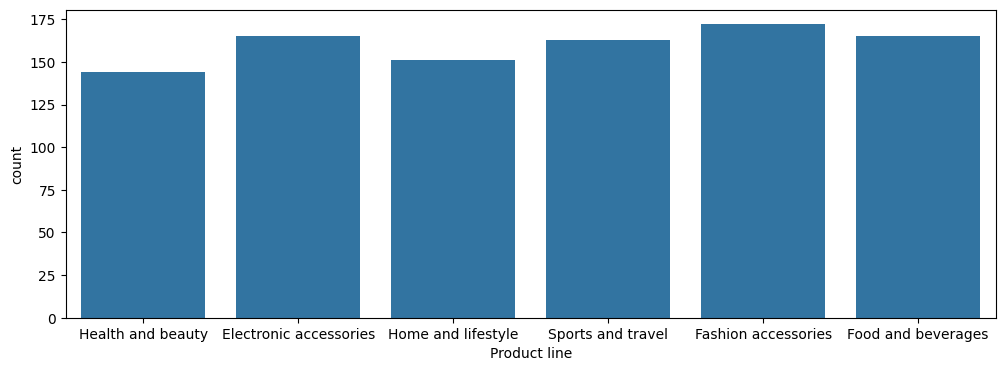

In [15]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Product line')

## **03. Bivariate Analysis**

Bivariate analysis involves examining the relationship between two variables to determine if there is a correlation or association between them.

### **3.1 Is there a relationship between Gross income and Customer ratings?**

<Axes: xlabel='gross income', ylabel='Rating'>

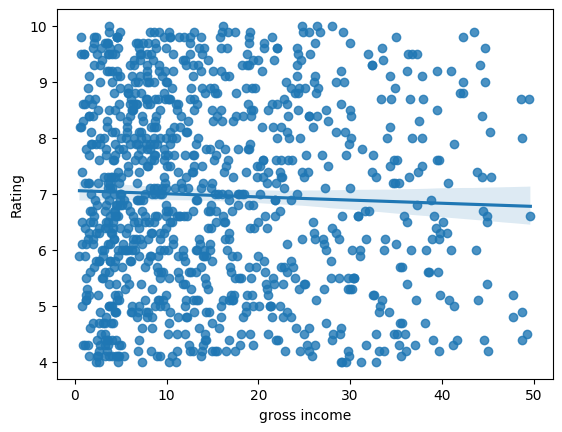

In [16]:
sns.regplot(data=df, x='gross income', y='Rating')

* There appears to be no correlation between customer rating and gross income.

### **3.2 How gross income is distributed across different branches?**

<Axes: xlabel='Branch', ylabel='gross income'>

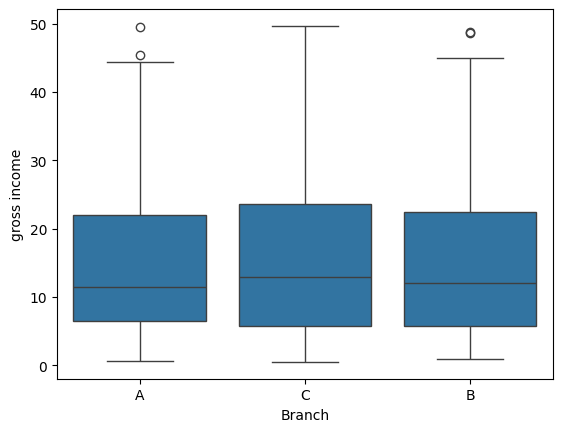

In [17]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

* Branch C showing bit higher median gross income compared to Branches A and B.
* There appears to be little variation in gross income among the different branches.

### **3.3 How gross income is distributed across Gender?**

<Axes: xlabel='Gender', ylabel='gross income'>

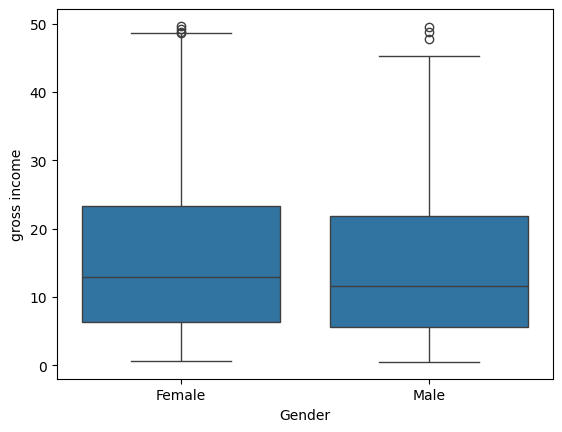

In [18]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

* There is a similar spread of gross income between men and women.
* The median Gross income appears to be similar from both men and women.
* At the 75th percentile, women spend more than men.
  - When comparing the spending habits of men and women in the dataset, at the 75th percentile (or the value below which 75% of the data falls), women tend to spend a higher amount than men.
  - In other words, 75% of women in the dataset spend more than or equal to the spending amount of 75% of men in the dataset.
* There are a few outliers (data points beyond the whiskers) for both genders, but there are slightly more outliers for women.

### **3.4 Is there a noticeable time trend in Gross income?**

In [19]:
numerical_df = pd.DataFrame(numerical_features)
numerical_df.head()

,Unit price,Quantity,Tax 5%,Total amount,Date,cogs,gross margin percentage,gross income,Rating
0,74.69,7.0,26.1415,548.9715,2019-01-05,522.83,4.761905,26.1415,9.1
1,15.28,5.0,3.8200,80.2200,2019-03-08,76.40,4.761905,3.8200,9.6
2,46.33,7.0,16.2155,340.5255,2019-03-03,324.31,4.761905,16.2155,7.4
3,58.22,8.0,23.2880,489.0480,2019-01-27,465.76,4.761905,23.2880,8.4
4,86.31,7.0,30.2085,634.3785,2019-02-08,604.17,4.761905,30.2085,5.3


In [20]:
df_grouped = numerical_df.groupby('Date').mean()
df_grouped.head()

,Unit price,Quantity,Tax 5%,Total amount,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333


Text(0.5, 1.0, 'Gross Income by Date')

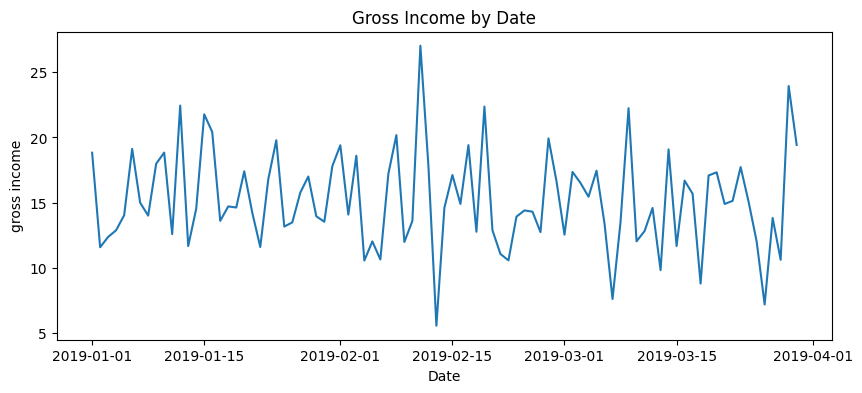

In [21]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=df_grouped.index, y=df_grouped['gross income'])

plt.title('Gross Income by Date')

* **There's no noticeable time trend in the graph.**
 - The data fluctuates around a stable mean value without a clear upward or downward trend over time.
* **There are noticeable fluctuations in the gross income on a daily basis.**
 - Some days showing significantly higher values and somedays showing significally lower values.
 - Based on this variability, it's likely that there are other factors (other independent variables) influencing daily income beyond just time.
* **The analysis is based on only three months of data. This limited duration may not sufficient to capture longer-term trends.**

### **3.5 Pairwise Comparison between Numerical variables**

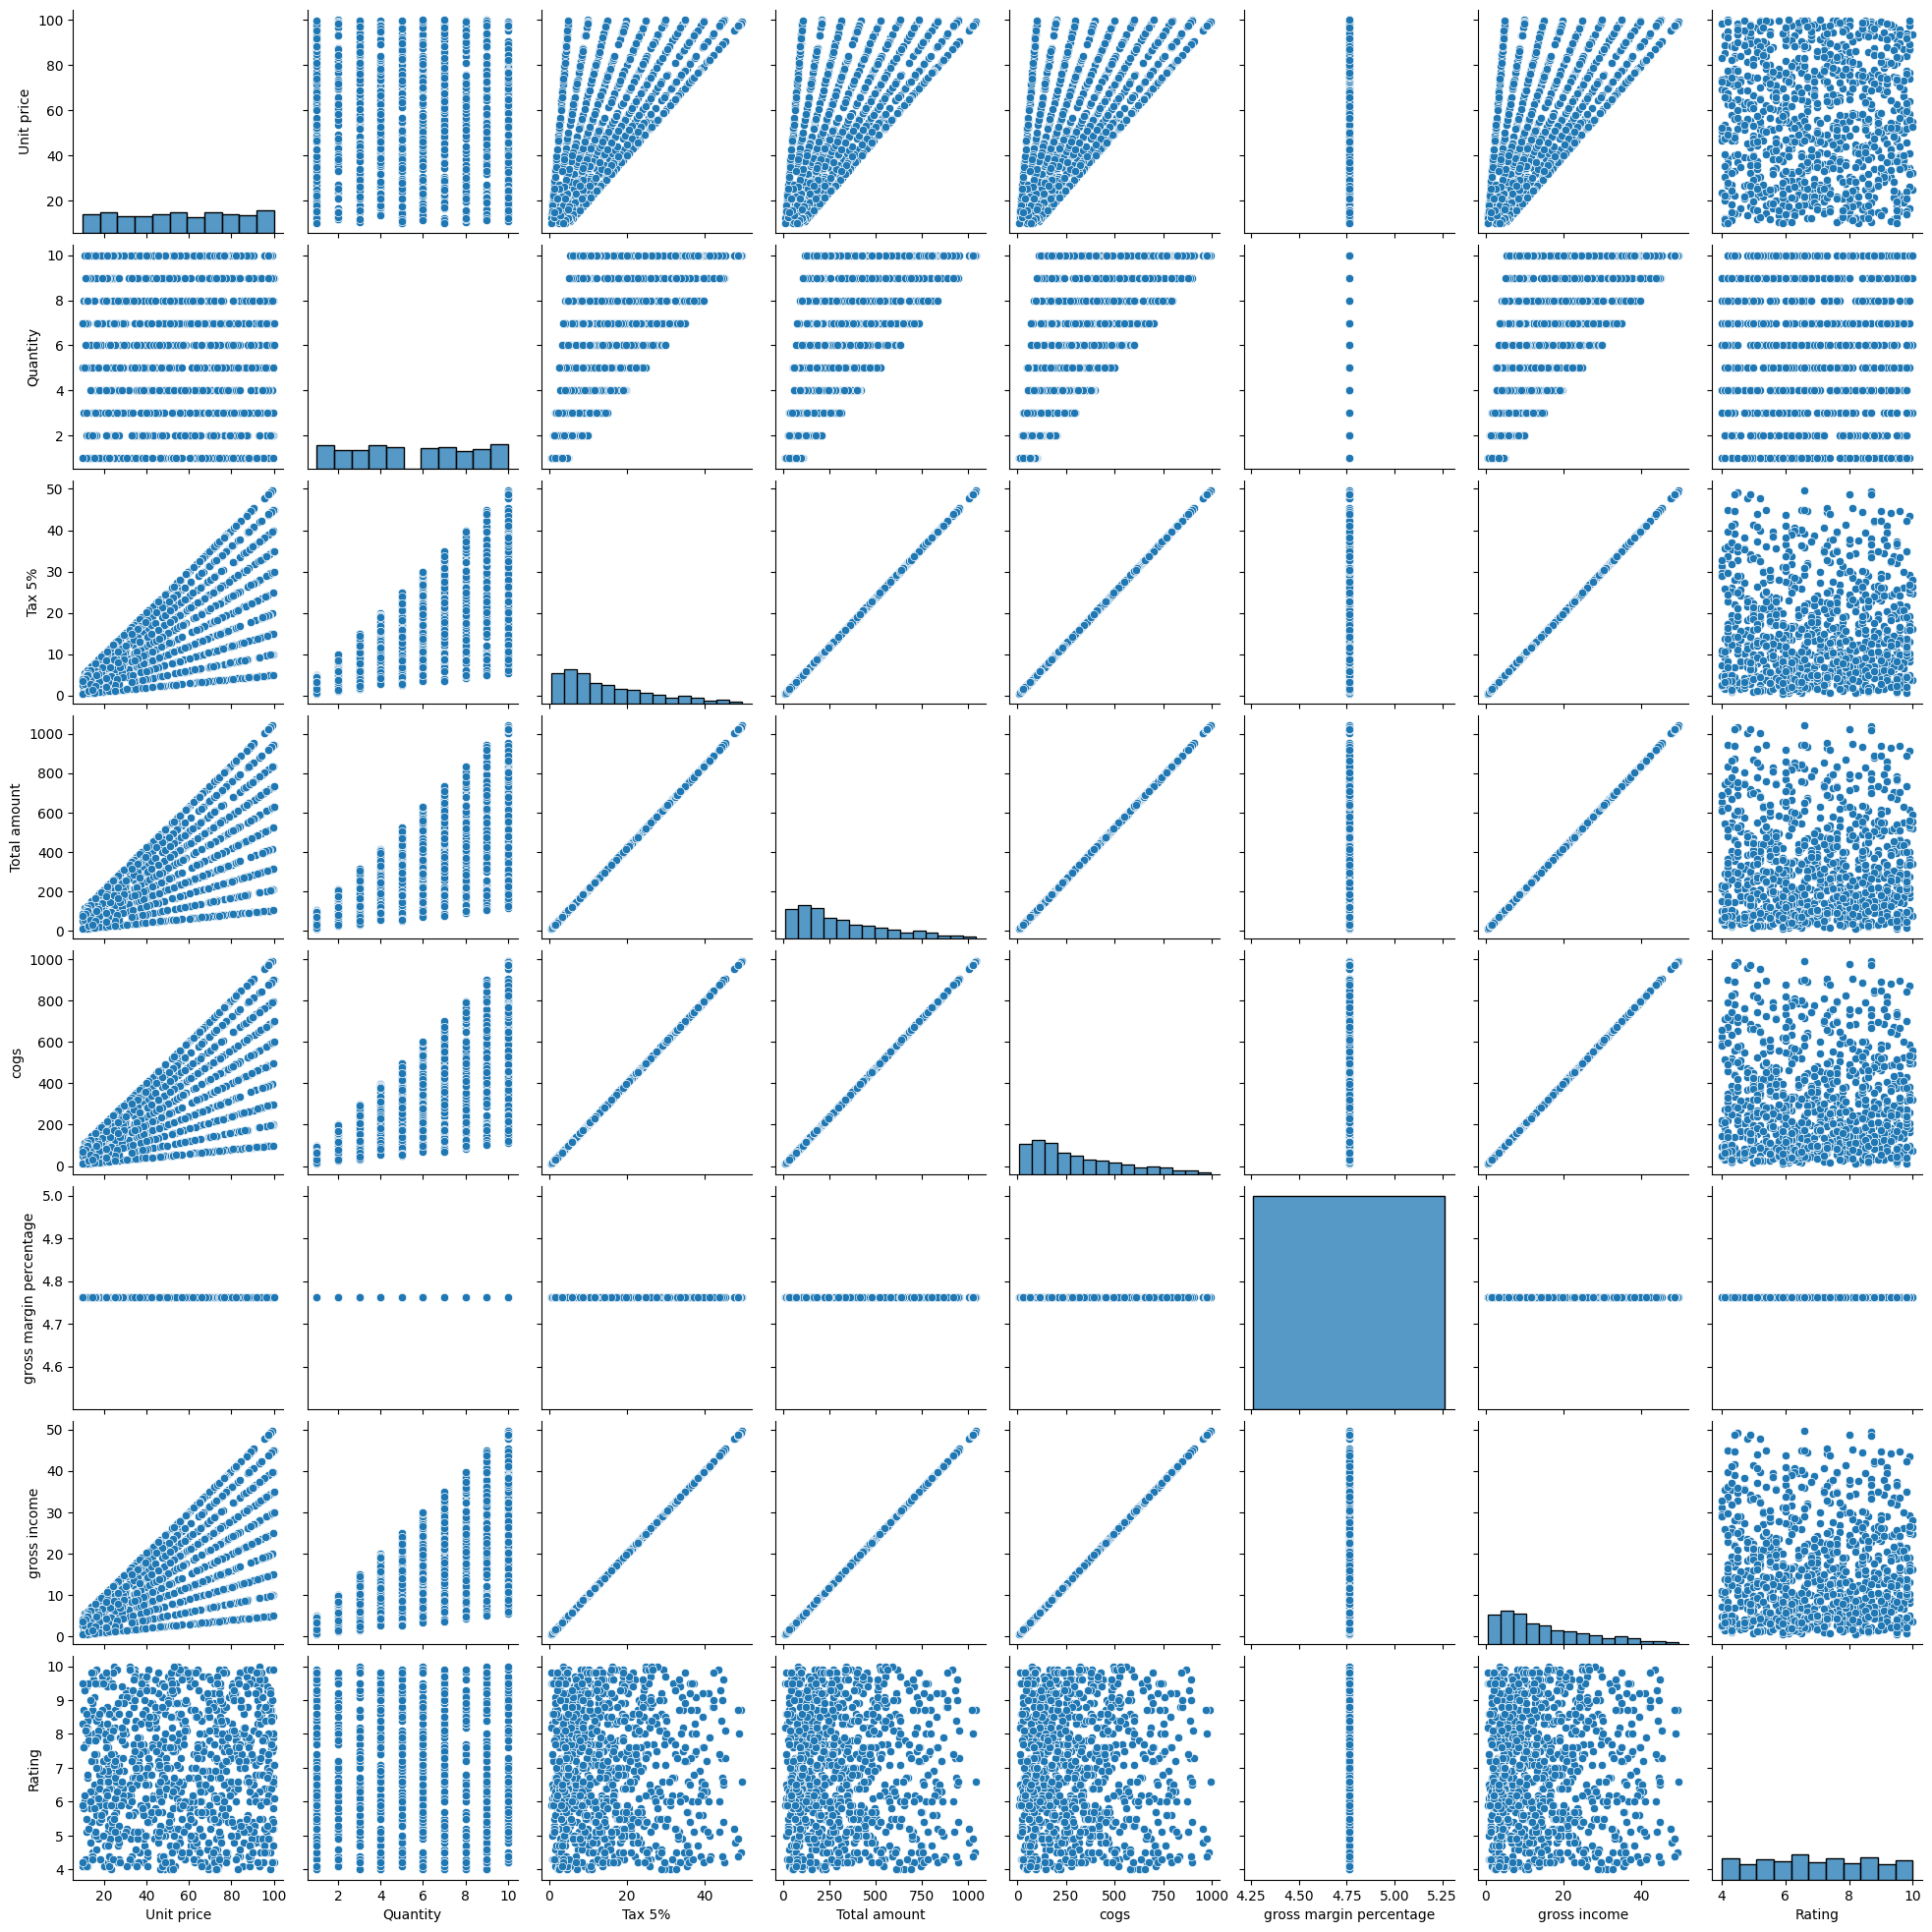

In [22]:
sns.pairplot(df)

## **04. Dealing with Duplicated rows & Missing values**

### **4.1 Dealing with Duplicated rows**

In [23]:
df.duplicated().sum()

3

In [24]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total amount,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,2019-03-10,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,2019-01-26,15:17,Cash,609.56,4.761905,30.478,5.5


In [25]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### **4.1 Dealing with Missing values**

In [26]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total amount                0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<Axes: >

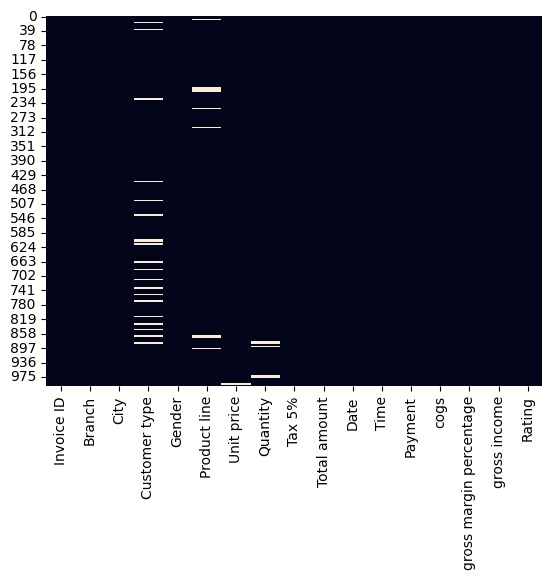

In [27]:
sns.heatmap(df.isnull(), cbar=False)

In [28]:
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [29]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total amount               0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## **05. Correlation Analysis**

In [30]:
df.corr()

,Unit price,Quantity,Tax 5%,Total amount,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.014786,0.629034,0.629034,0.629034,NaN,0.629034,-0.006601
Quantity,0.014786,1.000000,0.704067,0.704067,0.704067,NaN,0.704067,-0.021225
Tax 5%,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total amount,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.006601,-0.021225,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

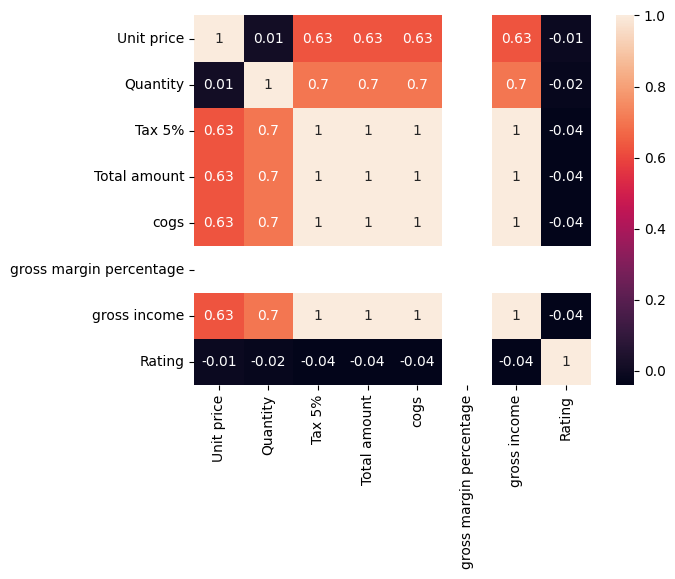

In [31]:
sns.heatmap(np.round(df.corr(),2), annot=True)

* The customer rating has a low correlation with every other variable.
* The amount a customer spends doesn't seem to affect their shopping experience rating.